In [27]:
# Necessary imports for data checking and visualization
import numpy as np                 # model arrays
import pandas as pd                # DataFrames
import matplotlib.pyplot as plt    # building plots
import seaborn as sns              # Plotting help
import os                          # accessing the operating system

In [28]:
# Make sure all columns are displayed when using dataframe
pd.set_option('display.max_columns', None)

In [29]:
# Relative paths used since assumption is that user is in root directory of forked Git repo.
well_data = pd.read_csv("../Hackalopes/wellData.csv")      # load the well data in
daily_data = pd.read_csv("../Hackalopes/dailyData.csv")    # load the daily data in
solution_data = pd.read_csv("../Hackalopes/solution.csv")  # load the solution data in
solution_data["Fail in 30 days"] = 0                       # Initialize solutions with 0
solution_data = solution_data.rename(columns={"Fail in 30 days": "Failed"})

In [30]:
# Preview well data
well_data.head(2)

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth
0,0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554
1,1,29,ESP_3,ESP,8982.09,0,6.440650,NaN,NaN,NaN,NaN,2.789395


In [31]:
# Preview daily data
daily_data.head(2)

,OIL,GAS,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,AL_Key,Well_ID
0,615.154601,650.447788,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
1,1224.193640,1232.455787,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345


In [32]:
# Preview the solution data
solution_data.head(2)

,Well_ID,AL_Key,Failed
0,327,ESP_1,0
1,125,ESP_2,0


In [33]:
# Combine all data into one dataframe
combined_data = pd.merge(pd.merge(well_data, daily_data, on=["Well_ID", "AL_Key"], how="left"), 
                         solution_data, on=["Well_ID", "AL_Key"], how="left")
combined_data["Failed"] = combined_data["Failed"].replace(np.nan, 1)
combined_data = combined_data.drop(columns=["Unnamed: 0"])
combined_data.head(2)

,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,OIL,GAS,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,615.154601,650.447788,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,1224.193640,1232.455787,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [34]:
# Backfill NaN values in OIL, GAS, and Water columns
combined_data["OIL"].fillna(method="bfill", inplace=True)
combined_data["GAS"].fillna(method="bfill", inplace=True)
combined_data["WATER"].fillna(method="bfill", inplace=True)


In [35]:
# Insert new ratios and features in dataframe
combined_data.insert(15, "GAS/OIL", combined_data["GAS"] / combined_data["OIL"])
combined_data.insert(16, "GAS/FLUID", combined_data["GAS"] / (combined_data["OIL"] * combined_data["WATER"]))
combined_data.insert(17, "SLOPE_GAS/OIL", combined_data["GAS/OIL"].diff())

In [36]:
# Creates a dataframe with only the data for the wells that haven't failed
solution_data = combined_data[combined_data["Failed"]==0]
solution_data.head(2)

,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,OIL,GAS,WATER,ARTIFICIAL_LIFT,GAS/OIL,GAS/FLUID,SLOPE_GAS/OIL,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
838,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.48168,178.181226,145.721524,146.775146,ESP,0.817828,0.005572,-1.071360,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
839,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.48168,1270.565335,813.464403,1298.498026,ESP,0.640238,0.000493,-0.177589,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [37]:
# Make dataframe for failed pumps
failed_data = combined_data[combined_data["Failed"]==1]
failed_data.head(2)


,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,OIL,GAS,WATER,ARTIFICIAL_LIFT,GAS/OIL,GAS/FLUID,SLOPE_GAS/OIL,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,615.154601,650.447788,526.488655,ESP,1.057373,0.002008,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,1224.193640,1232.455787,809.414685,ESP,1.006749,0.001244,-0.050624,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


['ESP_Motor_Frequency_Rating', 'ESP_Motor_Current_Rating', 'ESP_Motor_Voltage_Rating', 'ESP_Motor_Power_Rating'] were missing at least 50.0% of their data


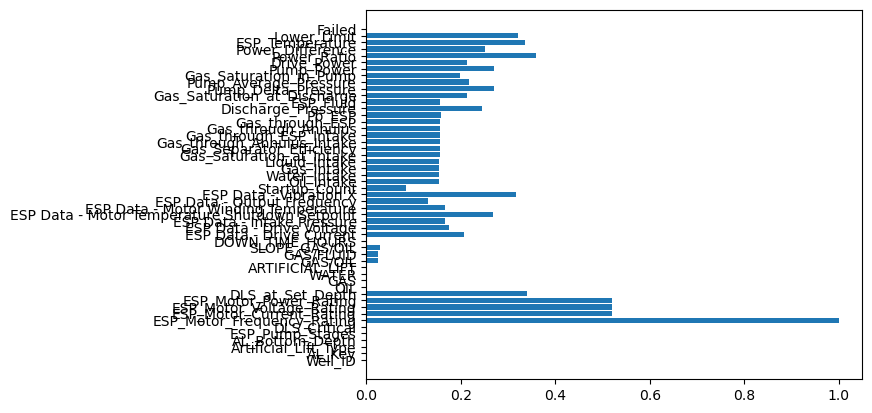

In [51]:
# Compute the completeness histogram for a given dataset
def completeness(df, cutoff=0.75):
    df_temp = df.copy(deep=True)                 # make a deep copy of the DataFrame
    df_bool = df_temp.isnull()
    features = list(df_bool.columns)
    percent_missing = []
    past_cutoff = []
    for feature in features:
        num_missing = df_bool[feature].sum()
        proportion_missing = df_bool[feature].sum() / len(df_bool)
        percent_missing.append(proportion_missing)
        if proportion_missing >= cutoff:
            past_cutoff.append(feature)
        # print(f'{feature}: {proportion_missing:.4f}')
    plt.barh(features, percent_missing)
    print(f'{past_cutoff} were missing at least {cutoff*100}% of their data')
completeness(solution_data, 0.5)


In [39]:
# Calculate the (spearman) correlation between all features in a dataframe.
def correlation(df, cutoff=0.75):
    corr = df.corr(method='spearman')
    correlated = []
    inversely_correlated = []
    for feature in corr:
        for feature2 in corr:
            correlation = corr[feature][feature2]
            if str(feature) == str(feature2):
                pass
            elif correlation >= cutoff:
                correlated.append((feature, feature2))
            elif correlation <= -cutoff:
                inversely_correlated.append((feature, feature2))
    print(f'Items listed here: {correlated} are correlated by a coefficient of at least {cutoff}')
    print('-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(f'Items listed here: {inversely_correlated} are inversely correlated by a coefficient of at greatest -{cutoff}')
correlation(combined_data)

Items listed here: [('ESP_Motor_Voltage_Rating', 'ESP_Motor_Power_Rating'), ('ESP_Motor_Voltage_Rating', 'Lower_Limit'), ('ESP_Motor_Power_Rating', 'ESP_Motor_Voltage_Rating'), ('OIL', 'Oil_Intake'), ('OIL', 'Liquid_Intake'), ('OIL', 'Gas_through_ESP'), ('OIL', 'ESP_Fluid'), ('GAS', 'Gas_through_ESP'), ('WATER', 'Water_Intake'), ('WATER', 'Liquid_Intake'), ('WATER', 'Pump_Power'), ('GAS/OIL', 'Gas_Saturation_at_Intake'), ('GAS/FLUID', 'Gas_Saturation_at_Intake'), ('GAS/FLUID', 'Gas_Saturation_in_Pump'), ('ESP Data - Drive Current', 'Drive_Power'), ('ESP Data - Drive Voltage', 'ESP Data - Output Frequency'), ('ESP Data - Output Frequency', 'ESP Data - Drive Voltage'), ('Oil_Intake', 'OIL'), ('Oil_Intake', 'Liquid_Intake'), ('Oil_Intake', 'Gas_through_ESP'), ('Oil_Intake', 'ESP_Fluid'), ('Water_Intake', 'WATER'), ('Water_Intake', 'Liquid_Intake'), ('Water_Intake', 'Pump_Power'), ('Gas_Intake', 'Gas_Saturation_at_Intake'), ('Gas_Intake', 'Gas_through_Annulus_Intake'), ('Gas_Intake', 'Gas_

In [40]:
# # Create data completeness histogram using the solution data

# # CREDIT PYRCZ LATER -- HIS CODE
# df_temp = solution_data.copy(deep=True)                 # make a deep copy of the DataFrame

# df_bool = df_temp.isnull()                              # true is value, false if NaN
# #df_bool = df_bool.set_index(df_temp.pop('UWI'))        # set the index / feature for the heat map y column
# heat = sns.heatmap(df_bool, cmap=['r','w'], annot=False, fmt='.0f',cbar=False,linecolor='black',linewidth=0.001) # make the binary heat map, no bins
# heat.set_xticklabels(heat.get_xticklabels(), rotation=90, fontsize=8)
# heat.set_yticklabels(heat.get_yticklabels(), rotation=0, fontsize=8)
 
# heat.set_title('Data Completeness Heatmap',fontsize=16); heat.set_xlabel('Feature',fontsize=12); heat.set_ylabel('Sample (Index)',fontsize=12)

# plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=3, wspace=0.2, hspace=0.2) # plot formatting
# plt.show()

In [41]:
# Create a matrix with our prioritized features
matrix = pd.DataFrame()
matrix = matrix.assign(Well_ID=combined_data["Well_ID"],
              AL_Key=combined_data["AL_Key"],
              AL_Bottom_Depth=combined_data["AL_Bottom_Depth"],
              DLS_Critical=combined_data["DLS_Critical"],
              DLS_at_Set_Depth=combined_data["DLS_at_Set_Depth"],
              Failed=combined_data["Failed"])


In [42]:
matrix.head(2)

,Well_ID,AL_Key,AL_Bottom_Depth,DLS_Critical,DLS_at_Set_Depth,Failed
0,345,ESP_2,9056.67,5.323174,1.713554,1.0
1,345,ESP_2,9056.67,5.323174,1.713554,1.0


In [43]:
# Simplest model first
# Add gas fluid ratio
# Keep: Dogleg at critical point, Well_ID, AL_Key, Bottom_Depth
# Drop: Artificial lift type, all ratings, drop failure types, Pump_Stages

# Dynamic:
# Add: Gas fluid ratio, Gas oil diff
# Keep: Well_ID, AL_Key, Pump Power, Gas over Oil, Gas Fluid, Vibration, Cumulative Oil, Gas oil diff 
# Drop: Oil Intage, Water Intake, Gas Intake, Artificial Lift Type, do correlation

In [44]:
# Most essential data to include in a minimum viable prototype
min_viable = combined_data.drop(columns=['Artificial_Lift_Type',
       'AL_Bottom_Depth', 'ESP_Pump_Stages',
       'ESP_Motor_Frequency_Rating', 'ESP_Motor_Current_Rating',
       'ESP_Motor_Voltage_Rating', 'ESP_Motor_Power_Rating',
       'DLS_at_Set_Depth', 'OIL', 'GAS', 'WATER', 'ARTIFICIAL_LIFT',
       'DOWN_TIME_HOURS', 'ESP Data - Drive Current',
       'ESP Data - Drive Voltage', 'ESP Data - Intake Pressure',
       'ESP Data - Motor Temperature Shutdown Setpoint',
       'ESP Data - Motor Winding Temperature', 'ESP Data - Output Frequency',
       'Startup_Count', 'Oil_Intake', 'Water_Intake',
       'Gas_Intake', 'Liquid_Intake', 'Gas_Saturation_at_Intake',
       'Gas_Separator_Efficiency', 'Gas_through_Annulus_Intake',
       'Gas_through_ESP_Intake', 'Gas_through_Annulus', 'Gas_through_ESP',
       'Pb_ESP', 'Discharge_Pressure', 'ESP_Fluid',
       'Gas_Saturation_at_Discharge', 'Pump_Delta_Pressure',
       'Pump_Average_Pressure', 'Gas_Saturation_in_Pump',
       'Drive_Power', 'Power_Ratio', 'Power_Difference', 'ESP_Temperature',
       'Lower_Limit', 'Failed'])
min_viable = min_viable[min_viable.AL_Key != "ESP_4"]
print(min_viable.head())

   Well_ID AL_Key  DLS_Critical   GAS/OIL  GAS/FLUID  SLOPE_GAS/OIL  \
0      345  ESP_2      5.323174  1.057373   0.002008            NaN   
1      345  ESP_2      5.323174  1.006749   0.001244      -0.050624   
2      345  ESP_2      5.323174  1.038996   0.001556       0.032247   
3      345  ESP_2      5.323174  0.904599   0.000806      -0.134397   
4      345  ESP_2      5.323174  1.272905   0.001101       0.368307   

   ESP Data - Vibration X  Pump_Power  
0                     NaN         NaN  
1                     NaN         NaN  
2                     NaN         NaN  
3                     NaN         NaN  
4                     NaN         NaN  


[] were missing at least 50.0% of their data


Text(0.5, 1.0, 'Completeness of New Dataset')

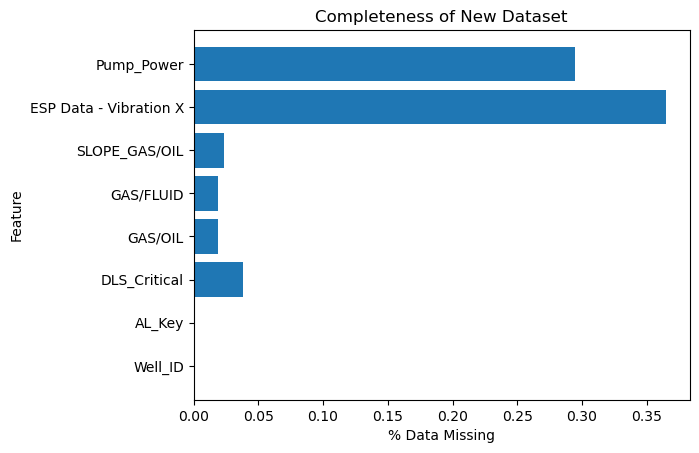

In [54]:
completeness(min_viable, 0.5)
plt.xlabel("% Data Missing")
plt.ylabel("Feature")
plt.title("Completeness of New Dataset")

In [46]:
well_data["DLS_Critical"].fillna(well_data["DLS_Critical"].mean(), inplace=True)
well_data.head()

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth
0,0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554
1,1,29,ESP_3,ESP,8982.09,0,6.440650,NaN,NaN,NaN,NaN,2.789395
2,2,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.481680
3,3,71,ESP_1,ESP,8930.11,0,5.614798,NaN,NaN,NaN,NaN,0.842038
4,4,125,ESP_2,ESP,8616.41,348,26.061750,NaN,NaN,NaN,NaN,NaN


In [47]:
# Function to separate a feature by time intervals
def separate_intervals(dataset, feature):
    grouped_data=combined_data.groupby(["Well_ID","AL_Key"])
    array_life=np.array(grouped_data.size())
    mega_matrix=np.array(grouped_data)
    test_array=np.array(dataset) # Get the Well_ID
    list_sort=[]
    list_fail=[]
    for i in range (0,len(mega_matrix)):
        flag=0
        for k in range(0,len(test_array)):        
            if mega_matrix[i][0][0] == test_array[k][0] and mega_matrix[i][0][1] == test_array[k][1]:
                list_sort.append(i)
                flag=1            
        if flag==0:
            list_fail.append(i)
    mega_s=mega_matrix[list_sort]
    mega_s_life=array_life[list_sort]

    
    mega_f=mega_matrix[list_fail]
    mega_f_life=array_life[list_fail]



    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time][feature].diff().mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end][feature].diff().mean()
        army.append(soldier)
    print(old_folks)
    print("HERE")
    print(army)
    return([old_folks, army])
separate_intervals(min_viable, "OIL")

C:\Users\danie\AppData\Local\Temp\ipykernel_4920\390499769.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mega_matrix=np.array(grouped_data)


[-0.26460529000000016, -0.2040226618421053]
HERE
[-0.3970143639534882, 0.04407199601307206]


[[-0.26460529000000016, -0.2040226618421053],
 [-0.3970143639534882, 0.04407199601307206]]

In [48]:
separate_intervals = separate_intervals(min_viable, "OIL")
print(separate_intervals)

C:\Users\danie\AppData\Local\Temp\ipykernel_4920\390499769.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mega_matrix=np.array(grouped_data)


[-0.26460529000000016, -0.2040226618421053]
HERE
[-0.3970143639534882, 0.04407199601307206]
[[-0.26460529000000016, -0.2040226618421053], [-0.3970143639534882, 0.04407199601307206]]


In [49]:
min_viable.head()

,Well_ID,AL_Key,DLS_Critical,GAS/OIL,GAS/FLUID,SLOPE_GAS/OIL,ESP Data - Vibration X,Pump_Power
0,345,ESP_2,5.323174,1.057373,0.002008,NaN,NaN,NaN
1,345,ESP_2,5.323174,1.006749,0.001244,-0.050624,NaN,NaN
2,345,ESP_2,5.323174,1.038996,0.001556,0.032247,NaN,NaN
3,345,ESP_2,5.323174,0.904599,0.000806,-0.134397,NaN,NaN
4,345,ESP_2,5.323174,1.272905,0.001101,0.368307,NaN,NaN


In [50]:
features_to_test = ["DLS_Critical", "GAS/OIL", "GAS/FLUID", "SLOPE_GAS/OIL",
                    "ESP Data - Vibration X", "Pump_Power"]
time_series_list = []
for feature in features_to_test:
    print("Feature:", feature)
    separated_intervals = separate_intervals(min_viable, feature)
    print(separate_intervals)
    separated_intervals.insert(0, feature)
    time_series_list.append(separated_intervals)
print(time_series_list)

Feature: DLS_Critical


TypeError: 'list' object is not callable